In [1]:
from hep_ml import reweight
from pandas import DataFrame

In [2]:
datTree = Tree(JetHT_Data_UL)
datTree.initialize_t6_X()

X = datTree.t6_X

In [3]:
cut_6jNN = 0

# edges of mH windows
SR_edge = 25 # GeV
VR_edge = 60 # GeV
CR_edge = 120 # GeV

In [4]:
mH = 125 # GeV

SR_lo = mH - SR_edge
SR_hi = mH + SR_edge

VR_lo = mH - VR_edge
VR_hi = mH + VR_edge

CR_lo = mH - CR_edge
CR_hi = mH + CR_edge

In [5]:
dat_6sums = ak.sum(datTree.t6_jet_btag, axis=1)/6

In [6]:
#### DATA ####
dat_6jNN_mask = datTree.b_6j_score > cut_6jNN # pass 6jNN mask

# dat_m_cand = datTree.t6_higgs_m[:,2]
dat_Dm_cand = abs(datTree.t6_higgs_m - 125)
dat_Dm      = datTree.t6_higgs_m - 125
dat_Dm_pos  = ak.all(datTree.t6_higgs_m - 125 > 0, axis=1)
dat_Dm_neg  = ak.all(datTree.t6_higgs_m - 125 < 0, axis=1)

# triple mass veto
dat_SR = ak.all(dat_Dm_cand <= SR_edge, axis=1) # SR
dat_VR = ak.all(dat_Dm_cand > SR_edge, axis=1) & ak.all(dat_Dm_cand <= VR_edge, axis=1) # VR
dat_CR = ak.all(dat_Dm_cand > VR_edge, axis=1) # CR

hi_m = ak.all(dat_Dm < -SR_edge, axis=1)
lo_m = ak.all(dat_Dm >= -VR_edge, axis=1)
dat_SRlo = ak.all(dat_Dm >= -SR_edge, axis=1) # SR
# dat_VRlo = ak.all(dat_Dm[dat_Dm_neg] < -SR_edge, axis=1) & ak.all(dat_Dm[dat_Dm_neg] >= -VR_edge, axis=1) # VR
dat_VRlo = hi_m & lo_m # VR
dat_CRlo = ak.all(dat_Dm < -VR_edge, axis=1) # CR

hi_m = ak.all(dat_Dm <= VR_edge, axis=1)
lo_m = ak.all(dat_Dm > SR_edge, axis=1)
dat_SRhi = ak.all(dat_Dm <= SR_edge, axis=1) # SR
dat_VRhi = hi_m & lo_m # VR
dat_CRhi = ak.all(dat_Dm > VR_edge, axis=1) # CR

# # single first mass veto
# dat_SR_1 = dat_Dm_cand[:,0] <= SR_edge # SR
# dat_VR_1 = (dat_Dm_cand[:,0] > SR_edge) & (dat_Dm_cand[:,0] <= VR_edge) # VR
# dat_CR_1 = dat_Dm_cand[:,0] > VR_edge # CR

# # second first mass veto
# dat_SR_2 = dat_Dm_cand[:,1] <= SR_edge # SR
# dat_VR_2 = (dat_Dm_cand[:,1] > SR_edge) & (dat_Dm_cand[:,1] <= VR_edge) # VR
# dat_CR_2 = dat_Dm_cand[:,1] > VR_edge # CR

# # third first mass veto
# dat_SR_3 = dat_Dm_cand[:,2] <= SR_edge # SR
# dat_VR_3 = (dat_Dm_cand[:,2] > SR_edge) & (dat_Dm_cand[:,2] <= VR_edge) # VR
# dat_CR_3 = dat_Dm_cand[:,2] > VR_edge # CR

In [7]:
dat_CR_lo = dat_Dm_neg & dat_CRlo
dat_CR_hi = dat_Dm_pos & dat_CRhi

dat_VR_lo = dat_Dm_neg & dat_VRlo
dat_VR_hi = dat_Dm_pos & dat_VRhi

In [8]:
# fig, ax = plt.subplots()

# ax.set_title('CR bands')

# n,e = Hist(ak.flatten(dat_Dm[dat_CR_lo]), bins=np.linspace(-250,250,100), ax=ax, label='low')
# n,e = Hist(ak.flatten(dat_Dm[dat_CR_hi]), bins=np.linspace(-250,250,100), ax=ax, label='high')

# ax.set_xlabel(r'$m_i - m_H$ [GeV]')
# ax.set_ylabel('Events')

# fig.savefig('CR_bands.pdf', bbox_inches='tight')

In [9]:
# fig, ax = plt.subplots()

# ax.set_title('Data, Separate CR bands')

# n,e = Hist(X.m[dat_CR_lo], bins=mBins, ax=ax, label='$(m_1, m_2, m_3) < 65 \;\mathrm{GeV}$')
# n,e = Hist(X.m[dat_CR_hi], bins=mBins, ax=ax, label='$(m_1, m_2, m_3) > 185 \;\mathrm{GeV}$')
# # n,e = Hist(X.m[dat_CR], bins=mBins, ax=ax, label='$(m_1, m_2, m_3) > 185 \;\mathrm{GeV}$')

# ax.legend(loc=2, fontsize=18)

# ax.set_ylabel('Events')
# ax.set_xlabel(r'$M_X$ [GeV]')

# fig.savefig('plots/MX700_MY400/dat_CR_bands.pdf', bbox_inches='tight')

In [10]:
# fig, ax = plt.subplots()

# ax.set_title('VR bands')

# n,e = Hist(dat_Dm[dat_VR_lo], bins=np.linspace(-250,250,100), ax=ax, label='low')
# n,e = Hist(dat_Dm[dat_VR_hi], bins=np.linspace(-250,250,100), ax=ax, label='high')

# ax.set_xlabel(r'$m_i - m_H$ [GeV]')
# ax.set_ylabel('Events')

# fig.savefig('VR_bands.pdf', bbox_inches='tight')

In [11]:
# fig, ax = plt.subplots()

# ax.set_title('Data, Separate VR bands')

# n,e = Hist(X.m[dat_VR_lo], bins=mBins, ax=ax, label='$65 < (m_1, m_2, m_3) < 100 \;\mathrm{GeV}$')
# n,e = Hist(X.m[dat_VR_hi], bins=mBins, ax=ax, label='$150 < (m_1, m_2, m_3) < 185 \;\mathrm{GeV}$')
# # n,e = Hist(X.m[dat_VR_hi], bins=mBins, ax=ax, label='$150 < (m_1, m_2, m_3) < 185 \;\mathrm{GeV}$', bottom=n)
# # n,e = Hist(X.m[dat_VR], bins=mBins, ax=ax, label='$150 < (m_1, m_2, m_3) < 185 \;\mathrm{GeV}$')

# ax.set_ylabel('Events')
# ax.set_xlabel(r'$M_X$ [GeV]')

# ax.legend(fontsize=18)

# fig.savefig('plots/MX700_MY400/dat_VR_bands.pdf', bbox_inches='tight')

In [12]:
nbins = 60
mBins = np.linspace(0,2000,nbins)

In [13]:
dat_sums = ak.sum(datTree.t6_jet_btag, axis=1)[dat_CR]/6
n_dat, edges = np.histogram(dat_sums.to_numpy(), bins=score_bins)

In [14]:
opt_cut = 0.66

In [15]:
#### DATA ####
# score veto
dat_ls_mask = ak.sum(datTree.t6_jet_btag, axis=1)/6 < opt_cut # ls
dat_hs_mask = ak.sum(datTree.t6_jet_btag, axis=1)/6 >= opt_cut # hs

dat_CR_lo_ls = dat_ls_mask & dat_CR_lo
dat_CR_hi_ls = dat_ls_mask & dat_CR_hi
dat_CR_lo_hs = dat_hs_mask & dat_CR_lo
dat_CR_hi_hs = dat_hs_mask & dat_CR_hi

dat_VR_lo_ls = dat_ls_mask & dat_VR_lo
dat_VR_hi_ls = dat_ls_mask & dat_VR_hi
dat_VR_lo_hs = dat_hs_mask & dat_VR_lo
dat_VR_hi_hs = dat_hs_mask & dat_VR_hi

# combination
dat_CRls_mask = dat_6jNN_mask & dat_CR & dat_ls_mask
dat_CRhs_mask = dat_6jNN_mask & dat_CR & dat_hs_mask
dat_VRls_mask = dat_6jNN_mask & dat_VR & dat_ls_mask
dat_VRhs_mask = dat_6jNN_mask & dat_VR & dat_hs_mask
dat_SRls_mask = dat_6jNN_mask & dat_SR & dat_ls_mask

In [16]:
TF = ak.sum(dat_CRhs_mask)/ak.sum(dat_CRls_mask)

TF_lo = ak.sum(dat_CR_lo_hs)/ak.sum(dat_CR_lo_ls)
TF_hi = ak.sum(dat_CR_hi_hs)/ak.sum(dat_CR_hi_ls)

TF_lohi = ak.sum(dat_CR_hi_hs)/ak.sum(dat_CR_lo_ls)
TF_hilo = ak.sum(dat_CR_lo_hs)/ak.sum(dat_CR_hi_ls)

In [17]:
max_mass = 2000
min_mass = 250

In [18]:
dat_crls_H1_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,0][dat_CRls_mask].to_numpy()
dat_crls_H1_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,1][dat_CRls_mask].to_numpy()
dat_crls_H2_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,0][dat_CRls_mask].to_numpy()
dat_crls_H2_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,1][dat_CRls_mask].to_numpy()
dat_crls_H3_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,0][dat_CRls_mask].to_numpy()
dat_crls_H3_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,1][dat_CRls_mask].to_numpy()
dat_crls_H1_pt = datTree.t6_higgs_pt[:,0][dat_CRls_mask].to_numpy()
dat_crls_H2_pt = datTree.t6_higgs_pt[:,1][dat_CRls_mask].to_numpy()
dat_crls_H3_pt = datTree.t6_higgs_pt[:,2][dat_CRls_mask].to_numpy()
dat_crls_H1_eta = datTree.t6_higgs_eta[:,0][dat_CRls_mask].to_numpy()
dat_crls_H2_eta = datTree.t6_higgs_eta[:,1][dat_CRls_mask].to_numpy()
dat_crls_H3_eta = datTree.t6_higgs_eta[:,2][dat_CRls_mask].to_numpy()
dat_crls_H1_dr = datTree.t6_higgs_dr[:,0][dat_CRls_mask].to_numpy()
dat_crls_H2_dr = datTree.t6_higgs_dr[:,1][dat_CRls_mask].to_numpy()
dat_crls_H3_dr = datTree.t6_higgs_dr[:,2][dat_CRls_mask].to_numpy()

dat_crhs_H1_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,0][dat_CRhs_mask].to_numpy()
dat_crhs_H1_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,1][dat_CRhs_mask].to_numpy()
dat_crhs_H2_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,0][dat_CRhs_mask].to_numpy()
dat_crhs_H2_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,1][dat_CRhs_mask].to_numpy()
dat_crhs_H3_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,0][dat_CRhs_mask].to_numpy()
dat_crhs_H3_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,1][dat_CRhs_mask].to_numpy()
dat_crhs_H1_pt = datTree.t6_higgs_pt[:,0][dat_CRhs_mask].to_numpy()
dat_crhs_H2_pt = datTree.t6_higgs_pt[:,1][dat_CRhs_mask].to_numpy()
dat_crhs_H3_pt = datTree.t6_higgs_pt[:,2][dat_CRhs_mask].to_numpy()
dat_crhs_H1_eta = datTree.t6_higgs_eta[:,0][dat_CRhs_mask].to_numpy()
dat_crhs_H2_eta = datTree.t6_higgs_eta[:,1][dat_CRhs_mask].to_numpy()
dat_crhs_H3_eta = datTree.t6_higgs_eta[:,2][dat_CRhs_mask].to_numpy()
dat_crhs_H1_dr = datTree.t6_higgs_dr[:,0][dat_CRhs_mask].to_numpy()
dat_crhs_H2_dr = datTree.t6_higgs_dr[:,1][dat_CRhs_mask].to_numpy()
dat_crhs_H3_dr = datTree.t6_higgs_dr[:,2][dat_CRhs_mask].to_numpy()

dat_vrls_H1_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,0][dat_VRls_mask].to_numpy()
dat_vrls_H1_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,1][dat_VRls_mask].to_numpy()
dat_vrls_H2_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,0][dat_VRls_mask].to_numpy()
dat_vrls_H2_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,1][dat_VRls_mask].to_numpy()
dat_vrls_H3_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,0][dat_VRls_mask].to_numpy()
dat_vrls_H3_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,1][dat_VRls_mask].to_numpy()
dat_vrls_H1_pt = datTree.t6_higgs_pt[:,0][dat_VRls_mask].to_numpy()
dat_vrls_H2_pt = datTree.t6_higgs_pt[:,1][dat_VRls_mask].to_numpy()
dat_vrls_H3_pt = datTree.t6_higgs_pt[:,2][dat_VRls_mask].to_numpy()
dat_vrls_H1_eta = datTree.t6_higgs_eta[:,0][dat_VRls_mask].to_numpy()
dat_vrls_H2_eta = datTree.t6_higgs_eta[:,1][dat_VRls_mask].to_numpy()
dat_vrls_H3_eta = datTree.t6_higgs_eta[:,2][dat_VRls_mask].to_numpy()
dat_vrls_H1_dr = datTree.t6_higgs_dr[:,0][dat_VRls_mask].to_numpy()
dat_vrls_H2_dr = datTree.t6_higgs_dr[:,1][dat_VRls_mask].to_numpy()
dat_vrls_H3_dr = datTree.t6_higgs_dr[:,2][dat_VRls_mask].to_numpy()

dat_vrhs_H1_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,0][dat_VRhs_mask].to_numpy()
dat_vrhs_H1_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,1][dat_VRhs_mask].to_numpy()
dat_vrhs_H2_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,0][dat_VRhs_mask].to_numpy()
dat_vrhs_H2_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,1][dat_VRhs_mask].to_numpy()
dat_vrhs_H3_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,0][dat_VRhs_mask].to_numpy()
dat_vrhs_H3_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,1][dat_VRhs_mask].to_numpy()
dat_vrhs_H1_pt = datTree.t6_higgs_pt[:,0][dat_VRhs_mask].to_numpy()
dat_vrhs_H2_pt = datTree.t6_higgs_pt[:,1][dat_VRhs_mask].to_numpy()
dat_vrhs_H3_pt = datTree.t6_higgs_pt[:,2][dat_VRhs_mask].to_numpy()
dat_vrhs_H1_eta = datTree.t6_higgs_eta[:,0][dat_VRhs_mask].to_numpy()
dat_vrhs_H2_eta = datTree.t6_higgs_eta[:,1][dat_VRhs_mask].to_numpy()
dat_vrhs_H3_eta = datTree.t6_higgs_eta[:,2][dat_VRhs_mask].to_numpy()
dat_vrhs_H1_dr = datTree.t6_higgs_dr[:,0][dat_VRhs_mask].to_numpy()
dat_vrhs_H2_dr = datTree.t6_higgs_dr[:,1][dat_VRhs_mask].to_numpy()
dat_vrhs_H3_dr = datTree.t6_higgs_dr[:,2][dat_VRhs_mask].to_numpy()

In [19]:
data_crls = np.column_stack((dat_crls_H1_b1_pt, dat_crls_H1_b2_pt, dat_crls_H2_b1_pt, dat_crls_H2_b2_pt, dat_crls_H3_b1_pt, dat_crls_H3_b2_pt, dat_crls_H1_pt, dat_crls_H2_pt, dat_crls_H3_pt, dat_crls_H1_dr, dat_crls_H2_dr, dat_crls_H3_dr, dat_crls_H1_eta, dat_crls_H2_eta, dat_crls_H3_eta))
data_crhs = np.column_stack((dat_crhs_H1_b1_pt, dat_crhs_H1_b2_pt, dat_crhs_H2_b1_pt, dat_crhs_H2_b2_pt, dat_crhs_H3_b1_pt, dat_crhs_H3_b2_pt, dat_crhs_H1_pt, dat_crhs_H2_pt, dat_crhs_H3_pt, dat_crhs_H1_dr, dat_crhs_H2_dr, dat_crhs_H3_dr, dat_crhs_H1_eta, dat_crhs_H2_eta, dat_crhs_H3_eta))

In [20]:
data_vrls = np.column_stack((dat_vrls_H1_b1_pt, dat_vrls_H1_b2_pt, dat_vrls_H2_b1_pt, dat_vrls_H2_b2_pt, dat_vrls_H3_b1_pt, dat_vrls_H3_b2_pt, dat_vrls_H1_pt, dat_vrls_H2_pt, dat_vrls_H3_pt, dat_vrls_H1_dr, dat_vrls_H2_dr, dat_vrls_H3_dr, dat_vrls_H1_eta, dat_vrls_H2_eta, dat_vrls_H3_eta))
data_vrhs = np.column_stack((dat_vrhs_H1_b1_pt, dat_vrhs_H1_b2_pt, dat_vrhs_H2_b1_pt, dat_vrhs_H2_b2_pt, dat_vrhs_H3_b1_pt, dat_vrhs_H3_b2_pt, dat_vrhs_H1_pt, dat_vrhs_H2_pt, dat_vrhs_H3_pt, dat_vrhs_H1_dr, dat_vrhs_H2_dr, dat_vrhs_H3_dr, dat_vrhs_H1_eta, dat_vrhs_H2_eta, dat_vrhs_H3_eta))

In [21]:
cols = ['H1 b1 pt','H1 b2 pt','H2 b1 pt','H2 b2 pt','H3 b1 pt','H3 b1 pt','H1 pt','H2 pt','H3 pt','H1 dr','H2 dr','H3 dr','H1 eta','H2 eta','H3 eta']

In [22]:
df_crls = DataFrame(data=data_crls, columns=cols)
df_crhs = DataFrame(data=data_crhs, columns=cols)

In [23]:
df_vrls = DataFrame(data=data_vrls, columns=cols)
df_vrhs = DataFrame(data=data_vrhs, columns=cols)

In [24]:
CRlslo = dat_Dm_neg[dat_CRls_mask].to_numpy()
CRlshi = dat_Dm_pos[dat_CRls_mask].to_numpy()
CRhslo = dat_Dm_neg[dat_CRhs_mask].to_numpy()
CRhshi = dat_Dm_pos[dat_CRhs_mask].to_numpy()

VRlslo = dat_Dm_neg[dat_VRls_mask].to_numpy()
VRlshi = dat_Dm_pos[dat_VRls_mask].to_numpy()
VRhslo = dat_Dm_neg[dat_VRhs_mask].to_numpy()
VRhshi = dat_Dm_pos[dat_VRhs_mask].to_numpy()

In [25]:
X_cr_ls_lo = ak.nan_to_num(X.m[dat_CRls_mask][CRlslo],0).to_numpy()
np.isnan(X_cr_ls_lo).sum()
X_vr_ls_lo = ak.nan_to_num(X.m[dat_VRls_mask][VRlslo],0).to_numpy()

In [26]:
X_cr_ls_hi = ak.nan_to_num(X.m[dat_CRls_mask][CRlshi],0).to_numpy()
np.isnan(X_cr_ls_hi).sum()
X_vr_ls_hi = ak.nan_to_num(X.m[dat_VRls_mask][VRlshi],0).to_numpy()

In [27]:
X_cr_ls = ak.nan_to_num(X.m[dat_CRls_mask],0).to_numpy()
np.isnan(X_cr_ls).sum()
X_vr_ls = ak.nan_to_num(X.m[dat_VRls_mask],0).to_numpy()

In [28]:
ls_weights = np.ones(len(df_crls))*TF
hs_weights = np.ones(len(df_crhs))

In [29]:
# A set of BDT arguments borrowed from 4b analysis
# Nestimators, learningRate, maxDepth, minLeaves, GB['subsample'], randomState
args = [40, 0.1, 3, 300, 0.6, 2020]

In [30]:
ls_weights = np.ones(len(df_crls[CRlslo]))*TF
hs_weights = np.ones(len(df_crhs[CRhshi]))

np.random.seed(args[5]) #Fix any random seed using numpy arrays
reweighter_base_lohi = reweight.GBReweighter(n_estimators=args[0], learning_rate=args[1], max_depth=args[2], min_samples_leaf=args[3],gb_args={'subsample': args[4]})
reweighter_lohi = reweight.FoldingReweighter(reweighter_base_lohi, random_state=args[5], n_folds=2, verbose=False)
reweighter_lohi.fit(df_crls[CRlslo],df_crhs[CRhshi],ls_weights,hs_weights)

FoldingReweighter(base_reweighter=GBReweighter(gb_args={'subsample': 0.6},
                                               learning_rate=0.1,
                                               min_samples_leaf=300),
                  random_state=2020, verbose=False)

In [31]:
weights_lohi = reweighter_lohi.predict_weights(df_vrls[VRlslo],np.ones(sum(VRlslo))*TF_lohi,lambda x: np.mean(x, axis=0))

In [32]:
ls_weights = np.ones(len(df_crls[CRlshi]))*TF
hs_weights = np.ones(len(df_crhs[CRhslo]))

np.random.seed(args[5]) #Fix any random seed using numpy arrays
reweighter_base_hilo = reweight.GBReweighter(n_estimators=args[0], learning_rate=args[1], max_depth=args[2], min_samples_leaf=args[3],gb_args={'subsample': args[4]})
reweighter_hilo = reweight.FoldingReweighter(reweighter_base_hilo, random_state=args[5], n_folds=2, verbose=False)
reweighter_hilo.fit(df_crls[CRlshi],df_crhs[CRhslo],ls_weights,hs_weights)

FoldingReweighter(base_reweighter=GBReweighter(gb_args={'subsample': 0.6},
                                               learning_rate=0.1,
                                               min_samples_leaf=300),
                  random_state=2020, verbose=False)

In [33]:
weights_hilo = reweighter_hilo.predict_weights(df_vrls[VRlshi],np.ones(sum(VRlshi))*TF_hilo,lambda x: np.mean(x, axis=0))

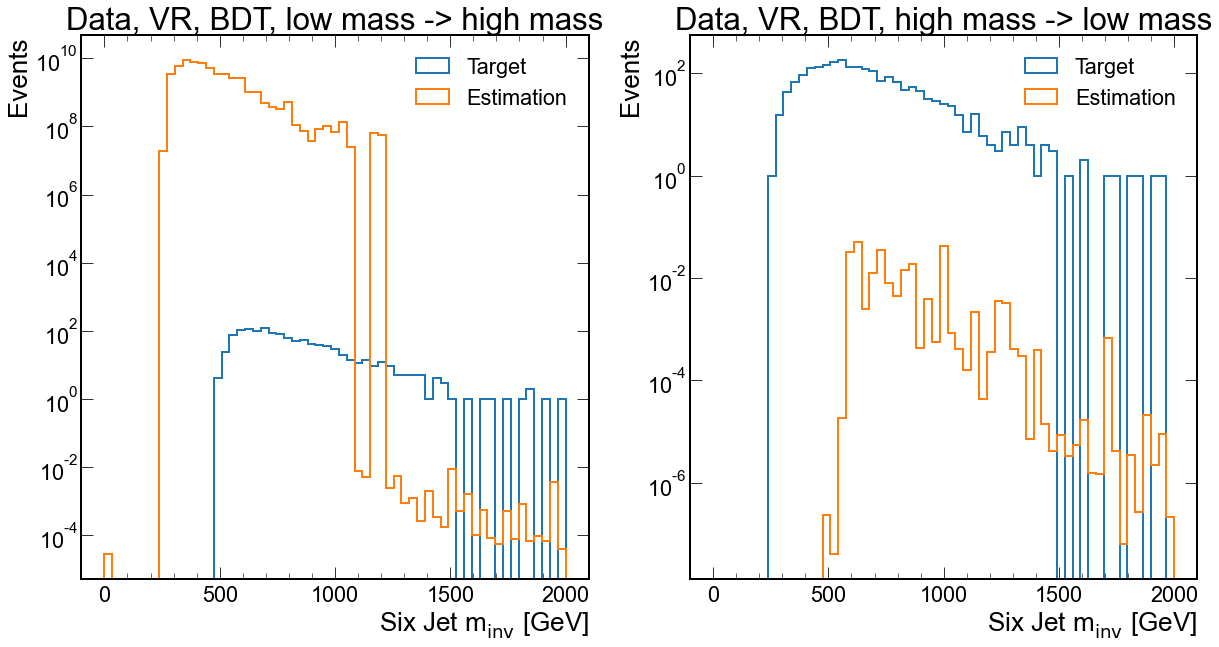

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax = axs[0]

ax.set_title('Data, VR, BDT, low mass -> high mass')
n_VRhs, e = Hist(X.m[dat_VRhs_mask].to_numpy()[VRhshi], bins=mBins, ax=ax, label='Target')
n_VRls_transformed, e = Hist(X_vr_ls_lo, weights=weights_lohi, bins=mBins, ax=ax, label='Estimation')

ax.set_yscale('log')
ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')
# ax.legend(loc=2)


ax = axs[1]

ax.set_title('Data, VR, BDT, high mass -> low mass')
n_VRhs, e = Hist(X.m[dat_VRhs_mask].to_numpy()[VRhslo], bins=mBins, ax=ax, label='Target')
n_VRls_transformed, e = Hist(X_vr_ls_hi, weights=weights_hilo, bins=mBins, ax=ax, label='Estimation')

ax.set_yscale('log')
ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')
# ax.legend(loc=2)

fig.savefig("plots/Data/mass_bands/VR_hilo_BDT.pdf", bbox_inches='tight')